In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('dados/electric-production.csv')

In [3]:
df.head()

,date,value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    397 non-null    object 
 1   value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df.index = pd.to_datetime(df['date'], format='%m-%d-%Y')

In [6]:
df.drop(columns=['date'], inplace=True)

In [7]:
df.head()

,value
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


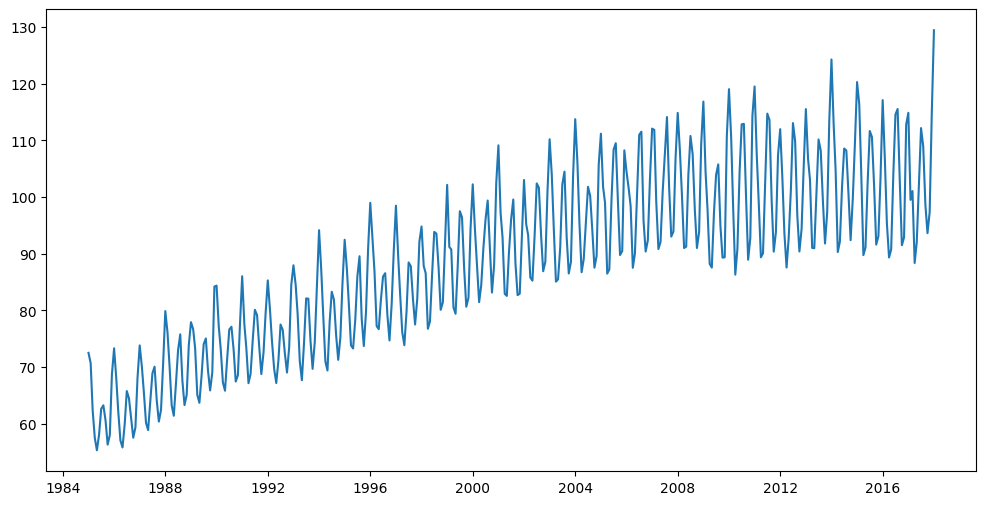

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df.value)
plt.show()

In [9]:
seasonal_decompose = seasonal_decompose(df)

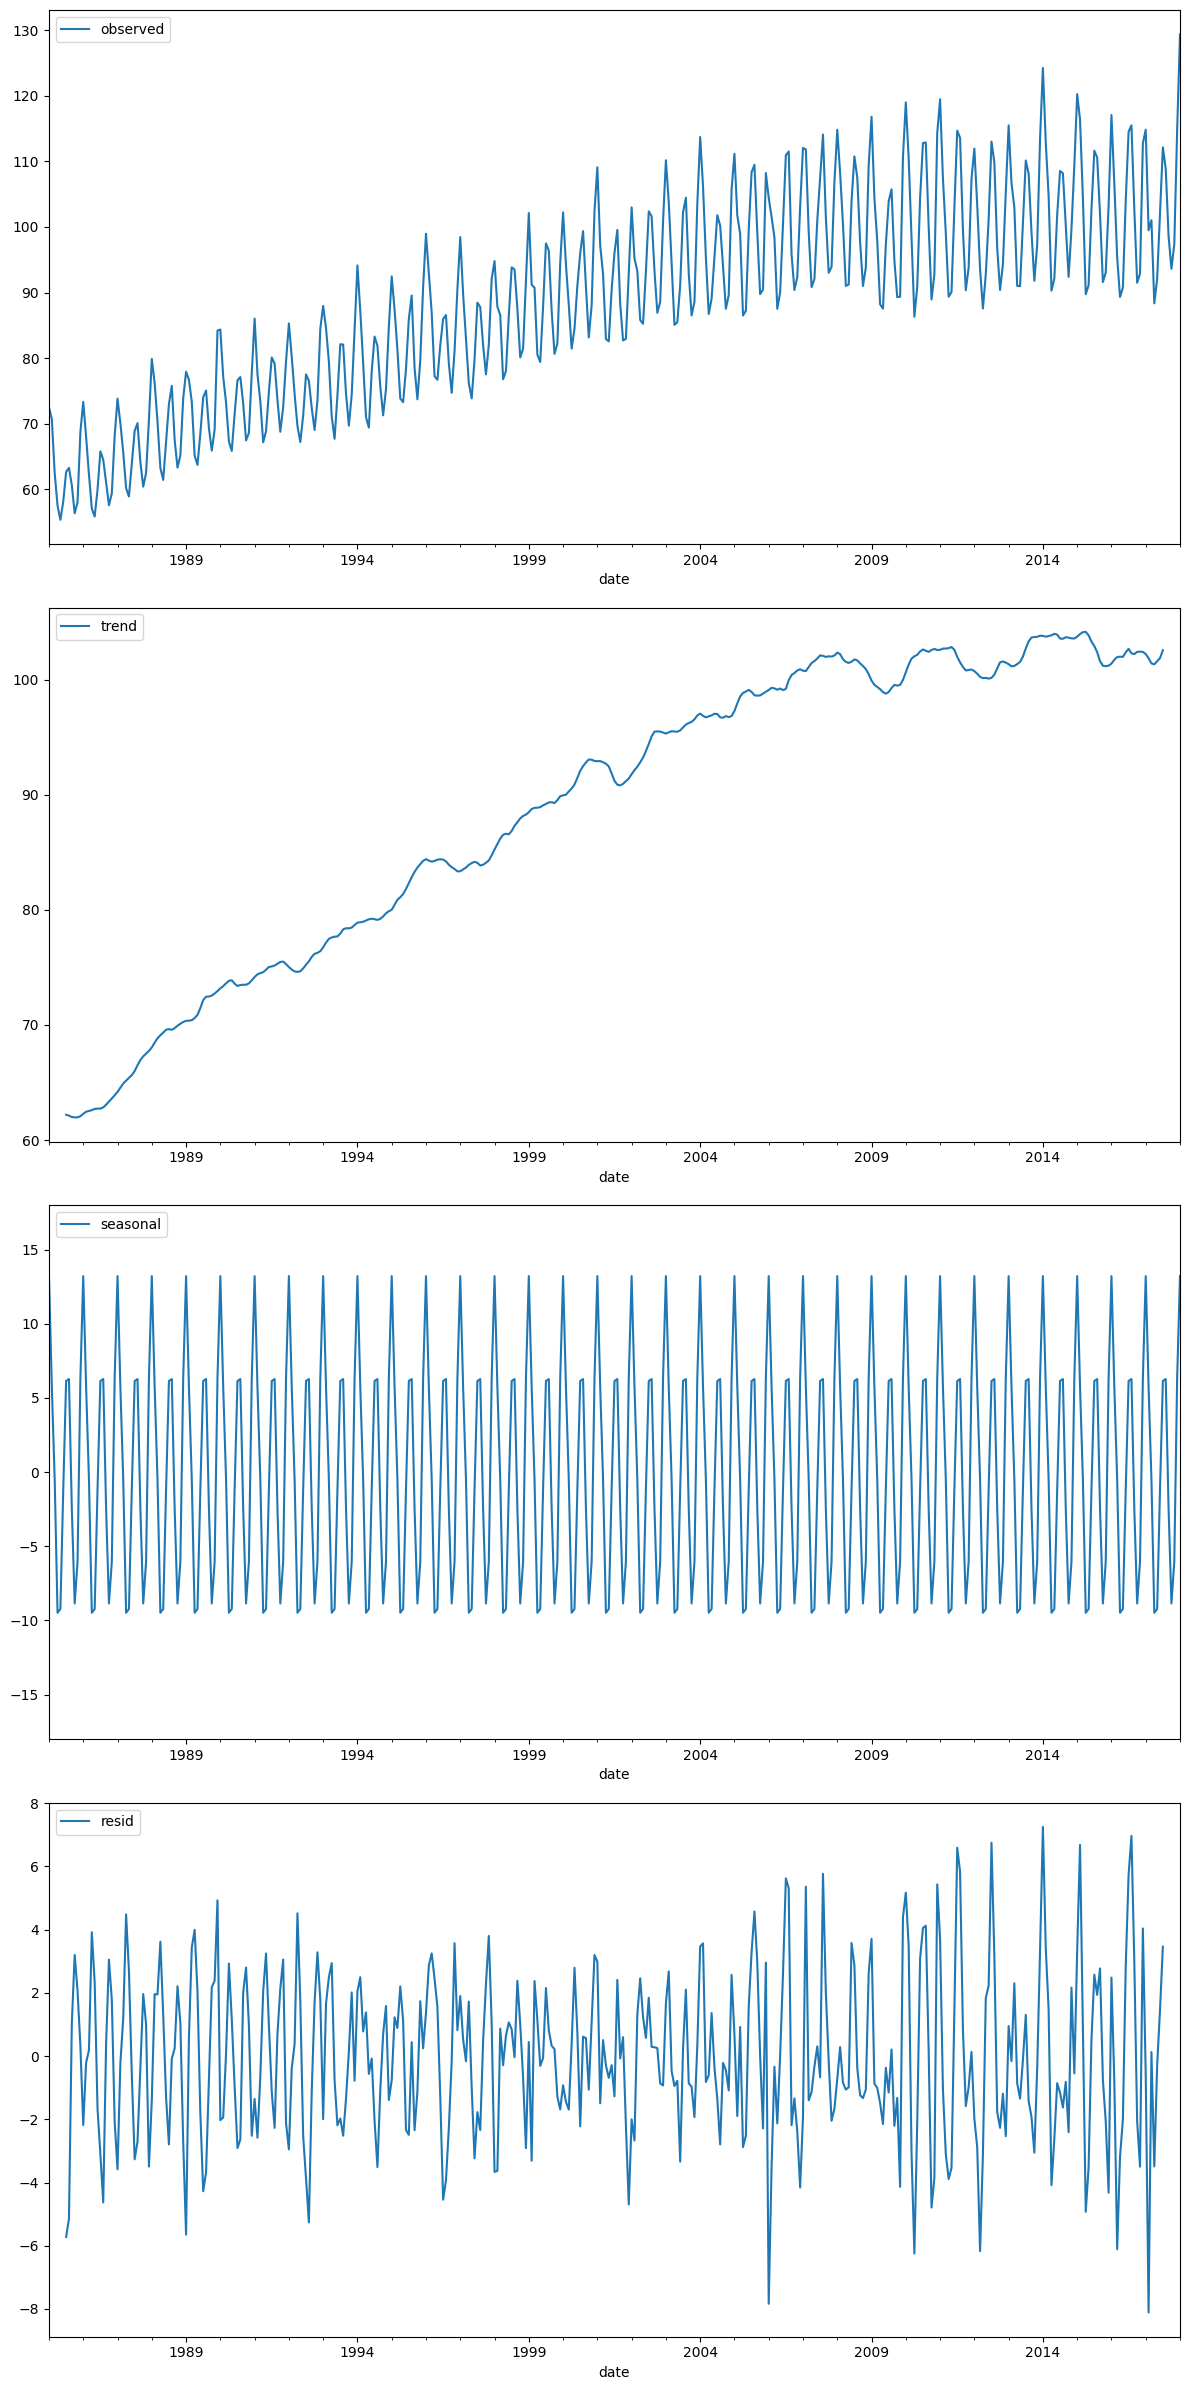

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,24))

seasonal_decompose.observed.plot(ax=ax1, label='observed')
ax1.legend(loc='upper left')

seasonal_decompose.trend.plot(ax=ax2, label='trend')
ax2.legend(loc='upper left')

seasonal_decompose.seasonal.plot(ax=ax3, label='seasonal')
ax3.legend(loc='upper left')
ax3.set_ylim(-18, 18)

seasonal_decompose.resid.plot(ax=ax4, label='resid')
ax4.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [11]:
# Teste ADF (Augmented Dickey-Fuller)
# Hipótese Nula -> Série não é estacionária
# Hipótese Alternativa -> Série é estacionária
# P-Value: 0.05

x = df.value.values
result = adfuller(x)

print('Teste ADF')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Value: {result[1]}')

print('Valores Críticos:')
for k, v in result[4].items():
    print(f'\t{k}: {v}')

Teste ADF
Teste Estatístico: -2.2569903500472397
P-Value: 0.18621469116586947
Valores Críticos:
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


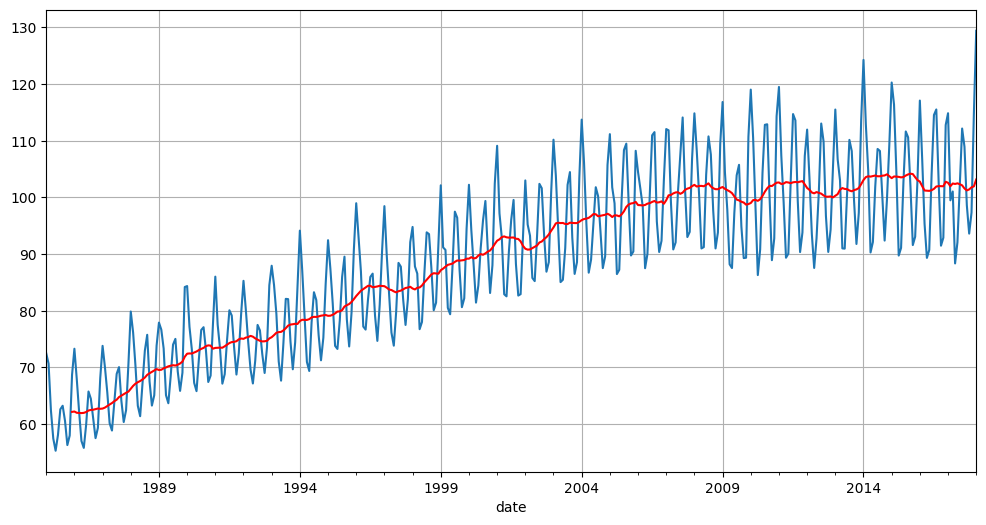

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(legend=False, ax=ax)
df.rolling(12).mean().plot(legend=False, color='r', ax=ax)
plt.grid(True)
plt.show()

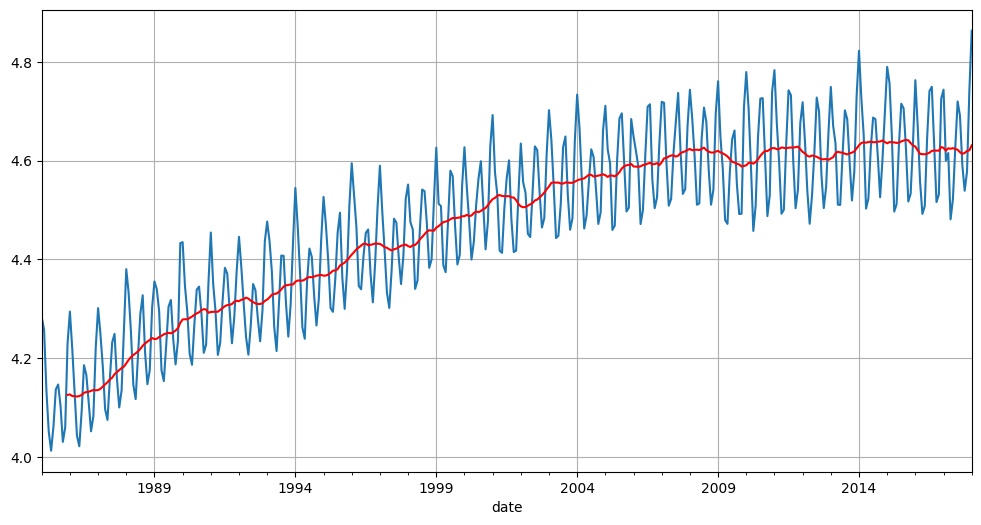

In [13]:
df_log = np.log(df)

fig, ax = plt.subplots(figsize=(12, 6))
df_log.plot(legend=False, ax=ax)
df_log.rolling(12).mean().plot(legend=False, color='r', ax=ax)
plt.grid(True)
plt.show()

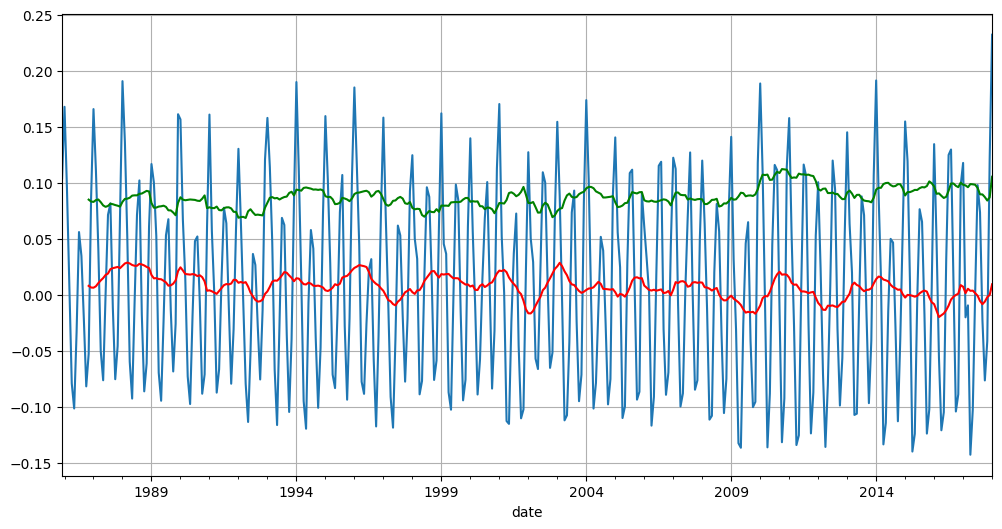

In [14]:
df_s = (df_log - df_log.rolling(12).mean()).dropna()

fig, ax = plt.subplots(figsize=(12, 6))
df_s.plot(legend=False, ax=ax)
df_s.rolling(12).mean().plot(legend=False, color='r', ax=ax)
df_s.rolling(12).std().plot(legend=False, color='g', ax=ax)
plt.grid(True)
plt.show()

In [15]:
# Teste ADF (Augmented Dickey-Fuller)
# Hipótese Nula -> Série não é estacionária
# Hipótese Alternativa -> Série é estacionária
# P-Value: 0.05

x_s = df_s.value.values
result_s = adfuller(x_s)

print('Teste ADF')
print(f'Teste Estatístico: {result_s[0]}')
print(f'P-Value: {result_s[1]}')

print('Valores Críticos:')
for k, v in result_s[4].items():
    print(f'\t{k}: {v}')

Teste ADF
Teste Estatístico: -5.211586185365431
P-Value: 8.325639759946487e-06
Valores Críticos:
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


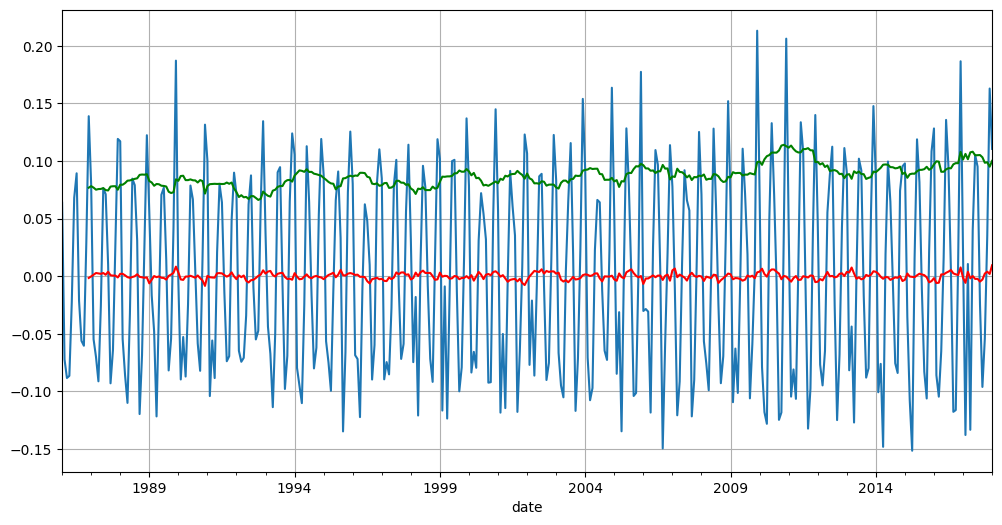

In [16]:
df_diff = df_s.diff(1).dropna()

fig, ax = plt.subplots(figsize=(12, 6))
df_diff.plot(legend=False, ax=ax)
df_diff.rolling(12).mean().plot(legend=False, color='r', ax=ax)
df_diff.rolling(12).std().plot(legend=False, color='g', ax=ax)
plt.grid(True)
plt.show()

In [17]:
# Teste ADF (Augmented Dickey-Fuller)
# Hipótese Nula -> Série não é estacionária
# Hipótese Alternativa -> Série é estacionária
# P-Value: 0.05

x_diff = df_diff.value.values
result_diff = adfuller(x_diff)

print('Teste ADF')
print(f'Teste Estatístico: {result_diff[0]}')
print(f'P-Value: {result_diff[1]}')

print('Valores Críticos:')
for k, v in result_diff[4].items():
    print(f'\t{k}: {v}')

Teste ADF
Teste Estatístico: -7.651129568145208
P-Value: 1.7881267354353756e-11
Valores Críticos:
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269
